# WeatherPy
----
Background
Using Python script to visualize & Analyse the weather of 500+ Cities across the World.
And varying their distance from the equator using :
CityPy
Python library
and the OpenWeatherMap API to using API keys.

The visualizations includce a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude 
Humidity (%) vs. Latitude 
Cloudiness (%) vs. Latitude 
Wind Speed (mph) vs. Latitude

Total scripts accomplishes the following:

Randomly selects at least 500 unique (non-repeat) cities based on Latitude and Longitude.
Performs a weather check on each of the cities using a series of successive API calls.
Print the log for the city number and city name.

Saves both a CSV of all data retrieved and png images for each scatter plot by title 
Output_CSV and Output_Plots.

Observations:
Temperature increases as we approach the equator. However, temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. 

Cloudiness and humidity do not show a strong correlation to Latitude. 
The visualizations below show a great variety of values at similar latitudes.

Wind speed appears to slightly increase as we move away from the equator. 
We did examined to make a definitive conclusion.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import random as random
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#pip install citipy


In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#get url
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
print(url)


http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=ec54fc6bb03e05fe285a0f5bfedcf3da


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a empty list to append data inti list
City_Name=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

# Data file print statement as it is
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Declare a record
record=1

#Use for loop through Cities in city list
for city in cities:
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
        response=requests.get(url).json()
        City_Name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        print(f"Processing record {record} | {city}")
        record=record + 1
    except Exception:
        print("City not found.....")
    
    continue



Beginning Data Retrieval
-------------------------------
Processing record 1 | atuona
Processing record 2 | bintulu
Processing record 3 | ushuaia
Processing record 4 | sinnamary
Processing record 5 | longyearbyen
Processing record 6 | kidal
Processing record 7 | novyy urengoy
Processing record 8 | ulaangom
Processing record 9 | ahipara
Processing record 10 | rikitea
Processing record 11 | east london
Processing record 12 | qaanaaq
Processing record 13 | mar del plata
Processing record 14 | erzurum
Processing record 15 | albany
Processing record 16 | turtas
Processing record 17 | carnarvon
Processing record 18 | grindavik
Processing record 19 | la ronge
Processing record 20 | ozubulu
City not found.....
Processing record 21 | hobyo
Processing record 22 | dikson
Processing record 23 | fortuna
Processing record 24 | tansen
Processing record 25 | hilo
Processing record 26 | ponta do sol
Processing record 27 | hithadhoo
Processing record 28 | iqaluit
Processing record 29 | punta arenas
Proc

Processing record 238 | bud
City not found.....
City not found.....
Processing record 239 | yulara
Processing record 240 | bahia de caraquez
Processing record 241 | daitari
Processing record 242 | ilulissat
Processing record 243 | nouadhibou
Processing record 244 | dubuque
Processing record 245 | petropavlovsk-kamchatskiy
Processing record 246 | aksu
Processing record 247 | sept-iles
Processing record 248 | kavieng
Processing record 249 | khuzhir
Processing record 250 | olafsvik
Processing record 251 | lahaina
City not found.....
Processing record 252 | kirchheim
Processing record 253 | salalah
Processing record 254 | zhicheng
Processing record 255 | kailua
Processing record 256 | sistranda
Processing record 257 | bandundu
Processing record 258 | shahr-e babak
Processing record 259 | sovetskiy
Processing record 260 | usvyaty
City not found.....
Processing record 261 | zhigansk
Processing record 262 | arraial do cabo
Processing record 263 | montepuez
Processing record 264 | iskateley
Pr

Processing record 476 | biltine
Processing record 477 | port lincoln
Processing record 478 | arenapolis
Processing record 479 | kijang
Processing record 480 | waitara
Processing record 481 | plettenberg bay
Processing record 482 | bac lieu
Processing record 483 | piacabucu
City not found.....
Processing record 484 | dunedin
Processing record 485 | caravelas
Processing record 486 | coffs harbour
Processing record 487 | chuy
Processing record 488 | yukhnov
Processing record 489 | ketchikan
Processing record 490 | santa isabel do rio negro
City not found.....
Processing record 491 | henties bay
Processing record 492 | awbari
Processing record 493 | san pedro
Processing record 494 | boueni
Processing record 495 | mehamn
Processing record 496 | carupano
Processing record 497 | gao
City not found.....
Processing record 498 | panguna
Processing record 499 | ola
Processing record 500 | morgantown
Processing record 501 | deer lake
Processing record 502 | atar
Processing record 503 | port blair


In [6]:
#Create DataFrame for Weather Data
City_Weather_df=pd.DataFrame({
    "City":City_Name,
    "Lat" : Lat,
    "Lng": Lng,
    "Max Temp" : Max_Temp,
    "Humidity" :  Humidity,
    "Cloudiness" : Cloudiness,
    "Wind Speed" : Wind_Speed,
    "Country" : Country,
    "Date" : Date
})
City_Weather_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
#To Show the DataFrame with Temp format is Kelvin
City_Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,299.55,78,5,7.89,PF,1595094277
1,Bintulu,3.17,113.03,299.15,94,20,1.50,MY,1595094277
2,Ushuaia,-54.80,-68.30,273.15,93,75,2.10,AR,1595094153
3,Sinnamary,5.38,-52.95,301.68,77,22,4.69,GF,1595094277
4,Longyearbyen,78.22,15.64,283.15,61,75,7.20,SJ,1595094121


In [8]:
#Convert Temp Kelvin to Farhenhite
City_Weather_df["Max Temp"]=(9/5)*(City_Weather_df["Max Temp"]-273)+32
City_Weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,79.790,78,5,7.89,PF,1595094277
1,Bintulu,3.17,113.03,79.070,94,20,1.50,MY,1595094277
2,Ushuaia,-54.80,-68.30,32.270,93,75,2.10,AR,1595094153
3,Sinnamary,5.38,-52.95,83.624,77,22,4.69,GF,1595094277
4,Longyearbyen,78.22,15.64,50.270,61,75,7.20,SJ,1595094121


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# To find the City and drop where Humidity >100
City_Weather_df.loc[City_Weather_df["Humidity"] >100].groupby("City")
City_Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,79.790,78,5,7.89,PF,1595094277
1,Bintulu,3.17,113.03,79.070,94,20,1.50,MY,1595094277
2,Ushuaia,-54.80,-68.30,32.270,93,75,2.10,AR,1595094153
3,Sinnamary,5.38,-52.95,83.624,77,22,4.69,GF,1595094277
4,Longyearbyen,78.22,15.64,50.270,61,75,7.20,SJ,1595094121


In [11]:
#  Get the indices of cities that have humidity over 100%.
print(f"There is no city where Humidity >100.{Humidity}")

There is no city where Humidity >100.[78, 94, 93, 77, 61, 34, 92, 60, 89, 80, 28, 70, 77, 38, 52, 64, 71, 62, 93, 91, 72, 94, 72, 100, 69, 62, 83, 100, 80, 26, 64, 94, 83, 77, 80, 54, 94, 82, 88, 80, 83, 94, 77, 85, 25, 70, 48, 100, 89, 89, 71, 72, 90, 87, 35, 64, 82, 83, 52, 50, 46, 29, 81, 48, 44, 80, 14, 87, 63, 82, 37, 33, 57, 24, 65, 57, 58, 20, 82, 94, 64, 93, 77, 93, 96, 73, 56, 65, 78, 94, 62, 46, 95, 91, 87, 88, 25, 38, 81, 93, 74, 82, 67, 31, 60, 52, 67, 43, 47, 82, 100, 96, 71, 72, 16, 87, 85, 81, 95, 68, 89, 100, 71, 87, 71, 58, 90, 23, 88, 60, 27, 98, 77, 74, 46, 84, 31, 83, 80, 82, 87, 68, 28, 15, 85, 76, 82, 93, 55, 28, 77, 10, 89, 90, 80, 60, 72, 67, 38, 82, 20, 71, 40, 80, 61, 76, 78, 64, 53, 75, 100, 45, 93, 74, 83, 66, 49, 93, 66, 83, 16, 56, 96, 44, 82, 62, 78, 47, 68, 96, 90, 94, 100, 94, 84, 44, 45, 95, 71, 72, 75, 48, 74, 75, 49, 59, 40, 97, 35, 90, 93, 88, 81, 11, 94, 86, 72, 73, 76, 91, 22, 57, 95, 87, 70, 90, 92, 34, 73, 72, 96, 80, 37, 94, 74, 74, 91, 67, 42,

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Weather_df=City_Weather_df
Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,79.790,78,5,7.89,PF,1595094277
1,Bintulu,3.17,113.03,79.070,94,20,1.50,MY,1595094277
2,Ushuaia,-54.80,-68.30,32.270,93,75,2.10,AR,1595094153
3,Sinnamary,5.38,-52.95,83.624,77,22,4.69,GF,1595094277
4,Longyearbyen,78.22,15.64,50.270,61,75,7.20,SJ,1595094121


In [13]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
Weather_df.to_csv("Output_CSV/Clean_City_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

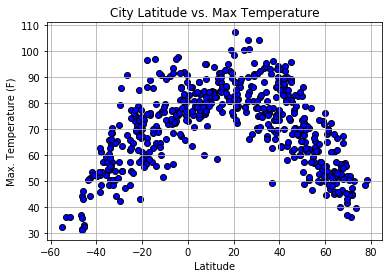

In [14]:
#To Create a Scatter plot Latitute vs Temperature
plt.scatter(Weather_df["Lat"],Weather_df["Max Temp"], marker="o", edgecolor="black", facecolor="blue")
# crate labeling
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

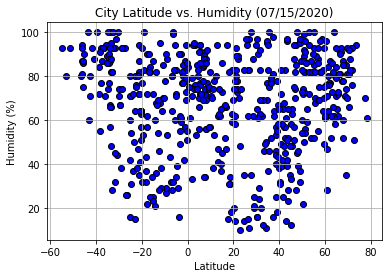

In [15]:
#To Create a Scatter plot Latitute vs Humidity
plt.scatter(Weather_df["Lat"],Weather_df["Humidity"], marker="o", edgecolor="black", facecolor="blue")
# crate labeling
plt.title("City Latitude vs. Humidity (07/15/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Temp_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

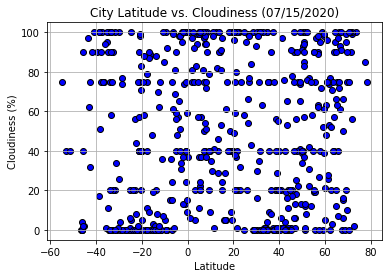

In [16]:
#To Create a Scatter plot Latitute vs Cloudiness
plt.scatter(Weather_df["Lat"],Weather_df["Cloudiness"], marker="o", edgecolor="black", facecolor="blue")
# Crate labeling
plt.title("City Latitude vs. Cloudiness (07/15/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Temp_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

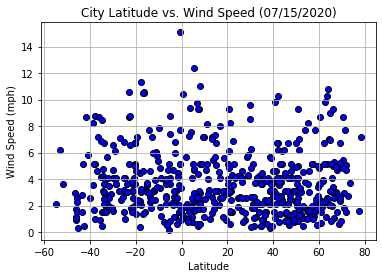

In [17]:
#To Create a Scatter plot Latitute vs Wind Speed
plt.scatter(Weather_df["Lat"],Weather_df["Wind Speed"], marker="o", edgecolor="black", facecolor="blue")
# Crate labeling
plt.title("City Latitude vs. Wind Speed (07/15/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Temp_vs_Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL:


In [18]:
# Create DataFrame for Northern and Southern Hemisphere
Northern_Hemisphere = Weather_df.loc[Weather_df["Lat"] >= 0]
Northern_Hemisphere.reset_index(inplace=True)

Southern_Hemisphere = Weather_df.loc[Weather_df["Lat"] < 0]
Southern_Hemisphere.reset_index(inplace=True)



# Create a function to create Linear Regression plots
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is : {rvalue**2}")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4859299012022301


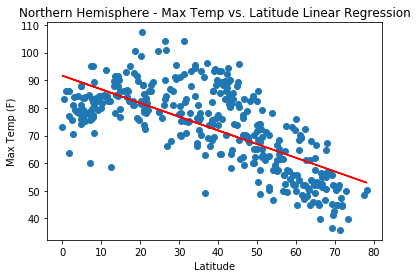

In [19]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
NH_equation=linear_agression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Max Temp"])
annotation=(NH_equation, 0, 0)
#Create Title & Label
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Output_Plots/NH_Max_Temp_vs_Lat_L_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5660583899002212


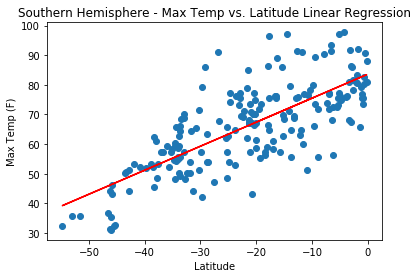

In [20]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
SH_equation=linear_agression(Southern_Hemisphere["Lat"],Southern_Hemisphere["Max Temp"])
annotation=(SH_equation, 0, 0)
#Create Title & Label
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Output_Plots/SH_Max_Temp_vs_Lat_L_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01097742760380723


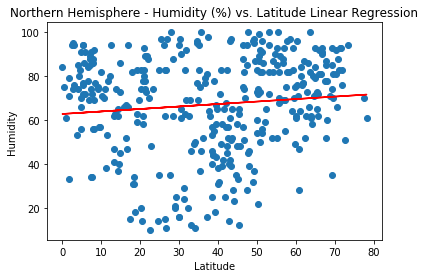

In [21]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
NH_equation=linear_agression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Humidity"])
annotation=(NH_equation, 0, 0)
#Create Title & Label
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Output_Plots/NH_Humidity_vs_Lat_L_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0830196641314479


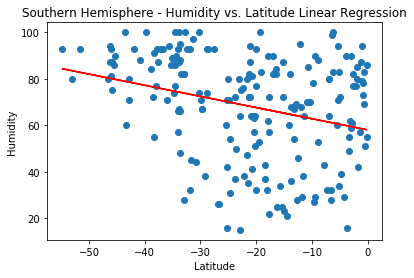

In [22]:
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
SH_equation=linear_agression(Southern_Hemisphere["Lat"],Southern_Hemisphere["Humidity"])
annotation=(SH_equation, 0, 0)
#Create Title & Label
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Output_Plots/SH_Humidy_vs_Lat_L_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0018790629133230755


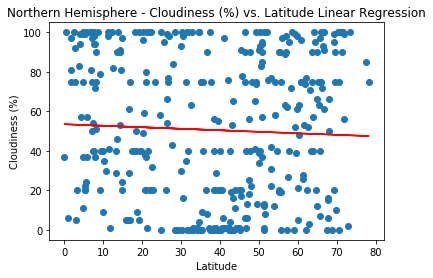

In [23]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
NH_equation=linear_agression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Cloudiness"])
annotation=(NH_equation, 0, 0)
#Create Title & Label
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Output_Plots/NH_Cloudiness_vs_Lat_L_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0013944557787421686


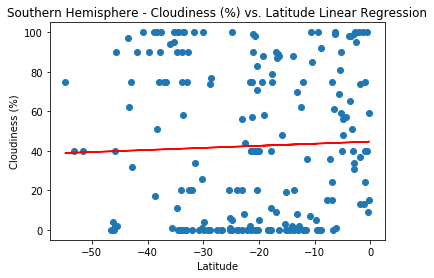

In [24]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
SH_equation=linear_agression(Southern_Hemisphere["Lat"],Southern_Hemisphere["Cloudiness"])
annotation=(SH_equation, 0, 0)
#Create Title & Label
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Output_Plots/SH_Cloudiness_vs_Lat_L_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.000423066984607933


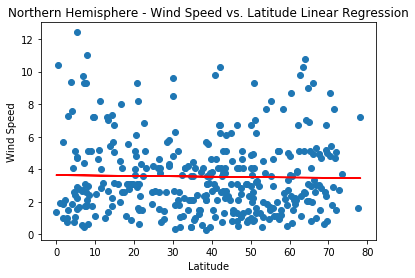

In [25]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
NH_equation=linear_agression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Wind Speed"])
annotation=(NH_equation, 0, 0)
#Create Title & Label
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Output_Plots/NH_Wind_Speed_vs_Lat_L_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0022425272745827717


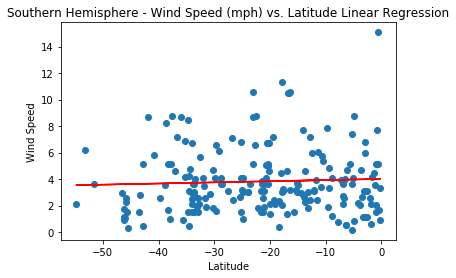

In [26]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
SH_equation=linear_agression(Southern_Hemisphere["Lat"],Southern_Hemisphere["Wind Speed"])
annotation=(SH_equation, 0, 0)
#Create Title & Label
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Output_Plots/SH_Wind_Speed_vs_Lat_L_Regression.png")